In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import IPython.display
import librosa
import librosa.display
from __future__ import print_function
from pydub import AudioSegment
import os
import glob
import pdb

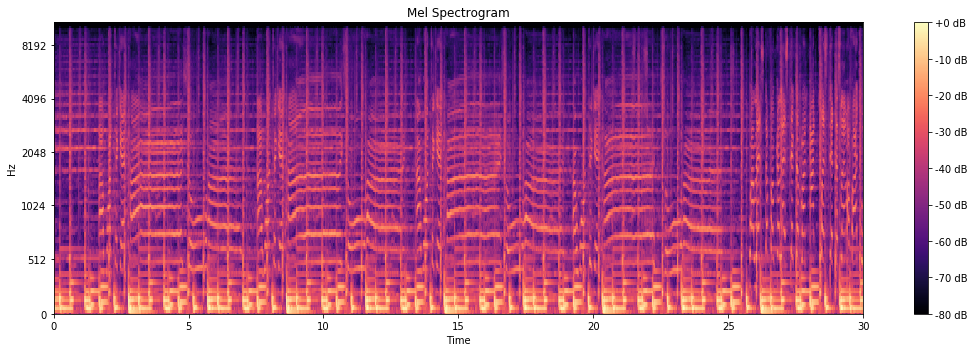

In [9]:
# Load an example file
audio_path = librosa.util.example_audio_file()
y, sr = librosa.load("/Users/Aidan/Desktop/2018/Winter/DeepLearning/GZTAN/hiphop/hiphop.00055.mp3",duration=30)

# Make a Mel Spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
# Convert to log scale (dB). Use the peak power as reference.
log_S = librosa.power_to_db(S, ref=np.max)
# Make figure
plt.figure(figsize=(15,5))
# Display the spectrogram on a mel scale, Sample rate and hop length determine the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [98]:
#This Block Converts to au to mp3, No need to run after the first time
for dir in os.walk('/Users/Aidan/Desktop/2018/Winter/DeepLearning/GZTAN'):
    songs = glob.glob(dir[0]+'/*.au')
    for song in songs:
        sound = AudioSegment.from_file(song)
        sound.export(song[:-3]+'.mp3', format="mp3", bitrate="128k")

In [4]:
# Create label grabber to pull metadata for labels
dirs = [x[0] for x in os.walk('/Users/Aidan/Desktop/2018/Winter/DeepLearning/GZTAN/')][1:]
labels = next(os.walk('/Users/Aidan/Desktop/2018/Winter/DeepLearning/GZTAN/'))[1]
def labelgrabber(song):
    a = np.zeros(10)
    for label in labels:
        if label in song:
            a[labels.index(label)] = 1
    return a

In [6]:
# Slice the audio files into slices, generate mel spectrogram, store data & labels 
nslices = 10
X = np.zeros((128**2,1000*nslices)) # CHANGE FIRST DIMENSION BASED ON SAMPLE TIME DURATION/LENGTH
Yhat = np.zeros((10,1000*nslices)) # CHANGE BACK to M
songs = []
for dir in dirs:
    songs.extend(glob.glob(dir+'/*.mp3'))
for n, song in enumerate(songs):
    if n % 100 == 0:
        print(songs.index(song)) # Uncomment to track preprocessing progress
    y, sr = librosa.load(song, duration = 30)
    songslices = []
    for i in range(nslices):
        songslices.append(y[i*65024:(i+1)*65024])

    for n, Slice in enumerate(songslices):
        # Make Mel spectrogram
        S = librosa.feature.melspectrogram(Slice, sr=sr, n_mels=128)
        # Convert to log scale (dB)
        log_S = librosa.power_to_db(S, ref=np.max)
        X[:,(nslices*songs.index(song) + n)] = log_S.flatten()
    Yhat[:,nslices*songs.index(song):nslices*(songs.index(song)+1)] = np.array([labelgrabber(song)]).T


0
100
200
300
400
500
600
700
800
900


In [7]:
# Shuffle data
Shuffle = np.arange(10000)
np.random.shuffle(Shuffle)
train = Shuffle[:9500]
dev = Shuffle[9500:9750]
test = Shuffle[9750:]

In [2]:
# Save data to text file
'''
np.savetxt('/Users/Aidan/Desktop/2018/Winter/DeepLearning/Main/Xtrain.txt',X[:,train])
np.savetxt('/Users/Aidan/Desktop/2018/Winter/DeepLearning/Main/Xdev.txt',X[:,dev])
np.savetxt('/Users/Aidan/Desktop/2018/Winter/DeepLearning/Main/Xtest.txt',X[:,test])

np.savetxt('/Users/Aidan/Desktop/2018/Winter/DeepLearning/Main/Ytrain.txt',Yhat[:,train])
np.savetxt('/Users/Aidan/Desktop/2018/Winter/DeepLearning/Main/Ydev.txt',Yhat[:,dev])
np.savetxt('/Users/Aidan/Desktop/2018/Winter/DeepLearning/Main/Ytest.txt',Yhat[:,test])
'''

NameError: name 'np' is not defined